In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
 pd.set_option('display.max_rows', 50)

# Analysis


In [3]:
# load data
df = pd.read_csv(r'..\data\processed\trips_custom_variables.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str}, parse_dates = ['start_time','end_time'])

## distance

In [4]:
# average distance by sex
df.groupby("sex").DISTANCIA_VIAJE.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Man,101580.0,7.912443,48.427322,0.0,0.720371,2.439516,8.663173,4517.331249
Woman,121164.0,6.866701,64.050900,0.0,0.602751,1.900106,6.813408,4521.973558


**weight by ELE_G_POND_ESC2 (weight of trip)**

In [5]:
# weighted average distance by sex
df["weighted_dist"] = df.DISTANCIA_VIAJE * df.ELE_G_POND_ESC2

# get the weighted mean distance
df_sex_sum = df.groupby("sex").sum()
df_sex_sum.weighted_dist / df_sex_sum.ELE_G_POND_ESC2 

sex
Man      7.887399
Woman    6.419492
dtype: float64

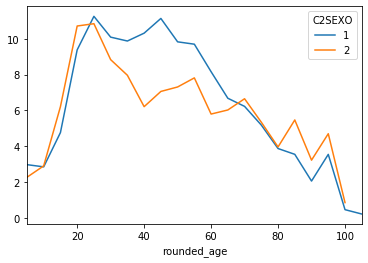

In [6]:
# average distance by age
x = df.groupby(["rounded_age", "C2SEXO"]).agg({"DISTANCIA_VIAJE":"mean"})
x = x.reset_index().pivot(index='rounded_age', columns='C2SEXO', values='DISTANCIA_VIAJE')
x.plot()

### amount of trips

In [7]:
# average amount of trips by sex
df.reset_index().groupby(["ID_HOGAR", "ID_IND", "sex"]).count().groupby("sex").mean().ID_VIAJE

sex
Man      2.604014
Woman    2.630854
Name: ID_VIAJE, dtype: float64

**weight by ELE_G_POND (weight of individual)**

In [8]:
# weighted average amount or trips by sex
df_ind = df.groupby(["ID_HOGAR", "ID_IND", "sex"]).ELE_G_POND.agg(['mean', 'sum'])
df_ind_sex_sum = df_ind.groupby("sex").sum()
df_ind_sex_sum['sum'] / df_ind_sex_sum['mean']

sex
Man      2.641541
Woman    2.682569
dtype: float64

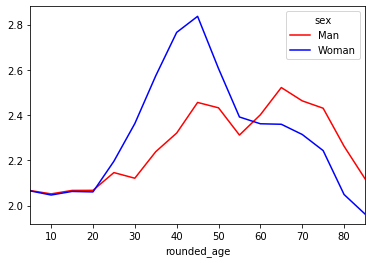

In [9]:
# amount of trips by age and sex

t_age = df.groupby(["rounded_age", "sex"]).agg({"ID_VIAJE":"mean"}).reset_index()

t_age = t_age[t_age.rounded_age < 90]
t_age = t_age.pivot(index='rounded_age', columns='sex', values='ID_VIAJE')
t_age.sort_index().plot(kind = "line", color = ["red", "blue"] )

In [10]:
# what trip motive do the different age groups have?
pd.DataFrame(df.groupby(["age_group", "sex"]).motive_simple.value_counts(normalize = True))

motive_simple
age_group    sex   motive_simple                  
adults       Man   work                   0.545824
                   leisure / sports       0.212014
                   care                   0.206571
                   other                  0.018226
                   study                  0.017364
             Woman work                   0.380059
                   care                   0.347828
                   leisure / sports       0.233156
                   other                  0.020716
                   study                  0.018241
kids         Man   study                  0.743695
                   leisure / sports       0.195934
                   care                   0.042048
                   other                  0.015183
                   work                   0.003139
             Woman study                  0.756549
                   leisure / sports       0.161954
                   care                   0.059459
                   other                  0.019543
                   work                   0.002495
seniors      Man   leisure / sports       0.459763
                   care                   0.301560
                   work                   0.202238
                   other                  0.031091
                   study                  0.005347
             Woman leisure / sports       0.401892
                   care                   0.391587
                   work                   0.164852
                   other                  0.034720
                   study                  0.006949
young adults Man   study                  0.386789
                   leisure / sports       0.317456
                   work                   0.206497
                   care                   0.065921
                   other                  0.023338
             Woman study                  0.391078
                   leisure / sports       0.271270
                   work                   0.207426
                   care                   0.104715
                   other                  0.025511

### Modal split

**aggregated modes**

In [11]:
# modal split men weighted
modes_weighted = df[df.sex == 'Man'].groupby(["mode_simple"]).sum()
modes_sex_sum = modes_weighted["ELE_G_POND_ESC2"].sum()
weighted_modes = pd.DataFrame(modes_weighted['ELE_G_POND_ESC2'] / modes_sex_sum).reset_index()
weighted_modes

,mode_simple,ELE_G_POND_ESC2
0,car,0.439187
1,other,0.027688
2,public transport,0.220380
3,walk,0.312744


In [12]:
# modal split women weighted
modes_weighted = df[df.sex == 'Woman'].groupby(["mode_simple"]).sum()
modes_sex_sum = modes_weighted["ELE_G_POND_ESC2"].sum()
weighted_modes = pd.DataFrame(modes_weighted['ELE_G_POND_ESC2'] / modes_sex_sum).reset_index()
weighted_modes

,mode_simple,ELE_G_POND_ESC2
0,car,0.354988
1,other,0.006683
2,public transport,0.274191
3,walk,0.364139


**full modes - public transport in detail**

In [13]:
# weighted
full_modes_weighted = df.groupby(["sex", "mode", "MODO_PRIORITARIO"]).sum()
modes_sex_sum = full_modes_weighted["ELE_G_POND_ESC2"].sum()
weighted_modes = pd.DataFrame(full_modes_weighted['ELE_G_POND_ESC2'] / modes_sex_sum).reset_index()

In [14]:
# public transport usage in detail
only_pt = weighted_modes[weighted_modes.MODO_PRIORITARIO < 10]
only_pt.sort_values("mode")

,sex,mode,MODO_PRIORITARIO,ELE_G_POND_ESC2
2,Man,Bus long haul ',9.0,0.000087
26,Woman,Bus long haul ',9.0,0.000064
4,Man,Cercanías',1.0,0.020139
28,Woman,Cercanías',1.0,0.022104
6,Man,LRT / tram ',5.0,0.000487
30,Woman,LRT / tram ',5.0,0.000579
7,Man,Meter ',4.0,0.040142
31,Woman,Meter ',4.0,0.051421
12,Man,Rest renfe ',7.0,0.000222
36,Woman,Rest renfe ',7.0,0.000236


### speed

In [15]:
# average speed by sex
df.groupby("sex").speed.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Man,101502.0,13.589210,14.519804,0.0,3.409656,8.030965,18.816042,145.303594
Woman,121095.0,11.632889,12.873258,0.0,3.138266,6.898600,15.205989,149.810836


In [16]:
# weighted average speed by sex
df["weighted_speed"] = df.speed * df.ELE_G_POND_ESC2

# get the weighted mean speed
df_sex_sum = df.groupby("sex").sum()
df_sex_sum.weighted_speed / df_sex_sum.ELE_G_POND_ESC2 

sex
Man      13.574981
Woman    11.087446
dtype: float64

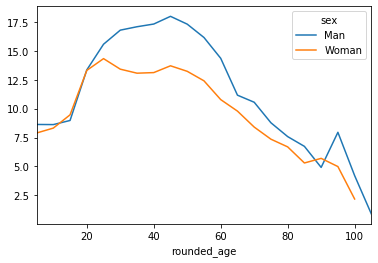

In [17]:
# average speed by age and sex
x = df.groupby(["rounded_age", "sex"]).agg({"speed":"mean"})
x = x.reset_index().pivot(index='rounded_age', columns='sex', values='speed')
x.plot()

In [18]:
# speed by mode and sex
df.groupby(["sex", "mode_simple"]).speed.describe()

count       mean        std  min       25%  \
sex   mode_simple                                                      
Man   car               44304.0  21.925916  16.179870  0.0  9.152454   
      other              2708.0  16.231940  13.733976  0.0  7.049733   
      public transport  22336.0  12.574530   9.683606  0.0  6.535480   
      walk              32154.0   2.584607   2.372329  0.0  1.388628   
Woman car               45546.0  20.123352  15.159405  0.0  8.449581   
      other               775.0  12.361797  10.800769  0.0  5.810543   
      public transport  32113.0  11.674829   8.863175  0.0  6.310020   
      walk              42661.0   2.523435   1.963335  0.0  1.402549   

                              50%        75%         max  
sex   mode_simple                                         
Man   car               17.397114  31.201447  145.303594  
      other             11.792933  21.097021  138.721951  
      public transport   9.586322  15.654492  141.592342  
      walk               2.381501   3.533331  144.425398  
Woman car               15.283129  27.914245  145.371572  
      other              9.489065  14.783374   67.854716  
      public transport   8.968342  14.301849  149.810836  
      walk               2.333292   3.448100  119.665207

### legs (etapas)

In [19]:
# average legs by sex
df.groupby(["sex"]).N_ETAPAS_POR_VIAJE.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Man,101580.0,1.136011,0.444797,1.0,1.0,1.0,1.0,6.0
Woman,121164.0,1.169836,0.493473,1.0,1.0,1.0,1.0,6.0


In [20]:
# weighted average legs
df["weighted_legs"] = df.N_ETAPAS_POR_VIAJE * df.ELE_G_POND_ESC2

# get the weighted mean legs count
df_sex_sum = df.groupby("sex").sum()
df_sex_sum.weighted_legs / df_sex_sum.ELE_G_POND_ESC2 

sex
Man      1.138136
Woman    1.170062
dtype: float64

In [21]:
# check: multiple legs only with public transport
df.groupby(["mode_simple"]).mean().N_ETAPAS_POR_VIAJE

mode_simple
car                 1.001279
other               1.000000
public transport    1.629330
walk                1.000000
Name: N_ETAPAS_POR_VIAJE, dtype: float64

In [22]:
# average legs by gender only for public transport trips
df[df.mode_simple == "public transport"].groupby("sex").mean().N_ETAPAS_POR_VIAJE

sex
Man      1.616004
Woman    1.638599
Name: N_ETAPAS_POR_VIAJE, dtype: float64

### main activity

In [23]:
# main activity of indivudals by sex
df.groupby(["sex"]).activity_simple.value_counts(normalize = True)

sex    activity_simple       
Man    working                   0.474748
       not working               0.279302
       student                   0.237037
       domestic and care work    0.008912
Woman  working                   0.459152
       not working               0.263013
       student                   0.162683
       domestic and care work    0.115152
Name: activity_simple, dtype: float64

### trip motive

In [24]:
# motive for trip by sex
df.groupby(["sex"]).motive_simple.value_counts(normalize = True)

sex    motive_simple   
Man    work                0.301792
       leisure / sports    0.300010
       care                0.196958
       study               0.178893
       other               0.022347
Woman  care                0.312131
       leisure / sports    0.279737
       work                0.257205
       study               0.125681
       other               0.025247
Name: motive_simple, dtype: float64

In [25]:
# average distance by motive
df.groupby(["motive_simple"]).DISTANCIA_VIAJE.mean()

motive_simple
care                 3.615657
leisure / sports     6.584344
other               19.904117
study                5.069237
work                11.767304
Name: DISTANCIA_VIAJE, dtype: float64

In [26]:
#average speed by motive
df.groupby(["motive_simple"]).speed.mean()

motive_simple
care                10.200145
leisure / sports    10.328908
other               12.082645
study                9.972583
work                18.404843
Name: speed, dtype: float64

### time of day

In [27]:
df.loc[df.start_time.notna(), "start_hour"] = df.loc[df.start_time.notna(), "start_time"].apply(lambda x: x.hour)

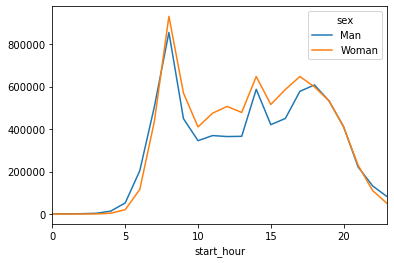

In [28]:
# weighted count of trips by sex and daytime
g = df.groupby(["sex", "start_hour"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()
g_plot = g.pivot(index='start_hour', columns='sex', values='ELE_G_POND_ESC2')
g_plot.plot(kind = "line")

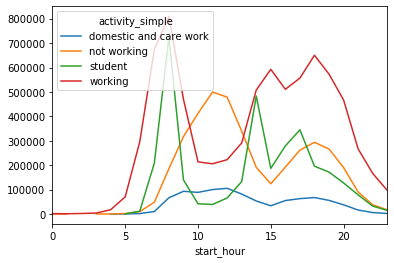

In [29]:
# weighted count of trips by main activity
g = df.groupby(["activity_simple", "start_hour"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()

g_plot = g.pivot(index='start_hour', columns='activity_simple', values='ELE_G_POND_ESC2')

g_plot.plot(kind = "line")

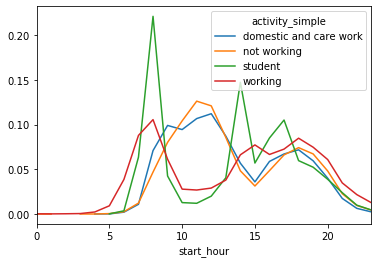

In [30]:
# percentage values
df_perc = g_plot / g_plot.sum()
df_perc.plot(kind = "line")

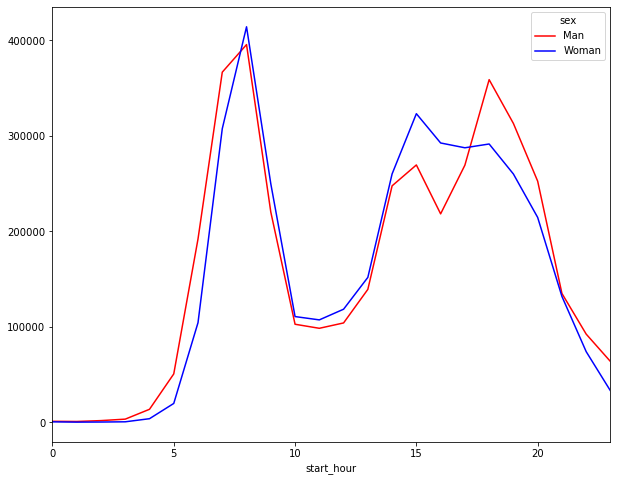

In [31]:
# weighted only working by gender
g = df[df.activity_simple == "working"].groupby(["sex", "start_hour"]).agg({"ELE_G_POND_ESC2": "sum"}).reset_index()
g_plot = g.pivot(index='start_hour', columns='sex', values='ELE_G_POND_ESC2')

g_plot.plot(kind = "line", figsize = (10,8), color = ["red", "blue"])